## SPAM DETECTION

Steps to perform:
1. Read dataset and make it in proper format
2. Encode labels
3. Convert call cases to lower
4. Remove punctuations
5. Remove Stopwords
6. Check stats of messages
7. Convert all texts into vectors
8. Import classifier
9. Train and test
10. Check the accuracy/Confusion matrix

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
# Reading dataset from spam.csv file
sms = pd.read_csv('spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


The dataset contains 5 columns named v1, v2, Unnamed 2,3 and 4. As the Unnamed features are only having NaN values, lets drop these columns. Also V1 column is label and v2 column is containing message. So lets rename them too.

In [3]:
# Dropping extra columns and renaming  v1 and v2
sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
sms.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [4]:
# Checking top 5 documents of the dataset
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Checking the dimension of the dataset
sms.shape

(5572, 2)

So now the dataset contains 5572 records and 2 columns.

In [6]:
# Checking the count of each column
print("Ham and spam counts\n",sms.label.value_counts())

Ham and spam counts
 ham     4825
spam     747
Name: label, dtype: int64


In [7]:
# Ratio of ham and spams
print("spam ratio = ",round(len(sms[sms['label']=='spam']) / len(sms.label),2)*100,"%")
print("ham ratio = ",round(len(sms[sms['label']=='ham']) / len(sms.label),2)*100,"%")

spam ratio =  13.0 %
ham ratio =  87.0 %


In [8]:
# Creating new column Length to check length of the message
sms['length'] = sms.message.str.len()
sms.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
# Label encoding 
sms['label'].replace({'ham':0,'spam':1},inplace=True)

In [10]:
# Converting all messages to lower case
sms['message'] = sms['message'].str.lower()

In [11]:
sms.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


### Text cleaning using Regular Expression

In [12]:
# Replacing 'email address with email'
sms['message'] = sms['message'].str.replace(r'6.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Repalcing urls with webaddress
sms['message'] = sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replacing money symbols with 'dollar'
sms['message'] = sms['message'].str.replace(r'£|\$','dollar')

# Replacing 10 digit phone number(including (),spaces,no spaces,dashes) with "phonenumber"
sms['message'] = sms['message'].str.replace(r'^\(?[\d]{3}\[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replacing numbers with "num"
sms['message'] = sms['message'].str.replace(r'\d(\.\d+)?','num')

In [13]:
# Removing Punctuations
sms['message'] = sms['message'].str.replace(r'[^\w\d\s]',' ')

# Removing whitespace between terms with a single space
sms['message'] = sms['message'].str.replace(r'\s+',' ')

# Removing leading and trailing whitespace
sms['message'] = sms['message'].str.replace(r'^\s+|\s+?$',' ')

In [14]:
sms.head()

,label,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in num a wkly comp to win fa cup fi...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


In [15]:
# Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','ure'])
sms['message'] = sms['message'].apply(lambda x: " ".join(
    term for term in x.split() if term not in stop_words))                                     

In [16]:
# New column(clean_lenth) after punctuations ,stopwords removal
sms['clean_length'] = sms.message.str.len()
sms.head()

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry num wkly comp win fa cup final tkts...,155,184
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38


In [17]:
# Total length removal
print("Original length :",sms.length.sum())
print("Clean length :",sms.clean_length.sum())

Original length : 447792
Clean length : 317154


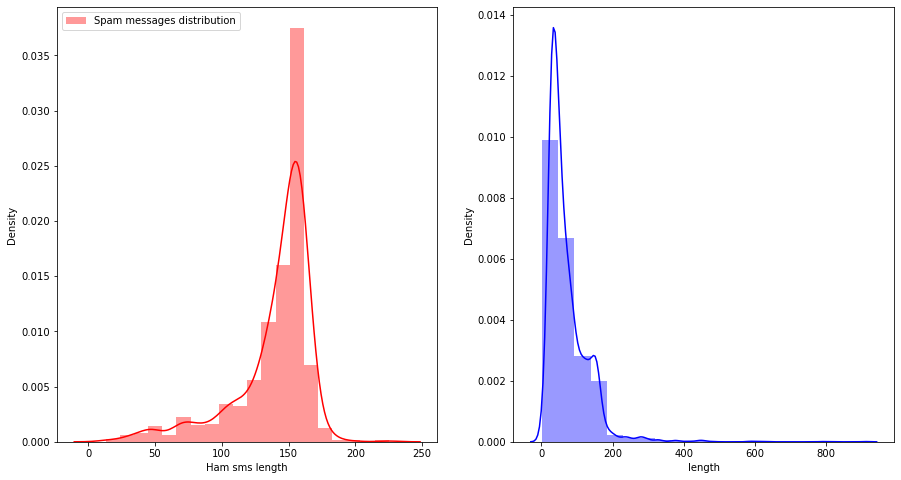

In [18]:
# Message distribution BEFORE cleaning

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['label']==1]['length'],bins = 20,ax = ax[0],label='Spam messages distribution',color ='r')
ax[0].set_xlabel("Spam sms length")
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length'],bins = 20,ax = ax[1],label='Ham messages distribution',color = 'b')
ax[0].set_xlabel("Ham sms length")
ax[0].legend()

plt.show()

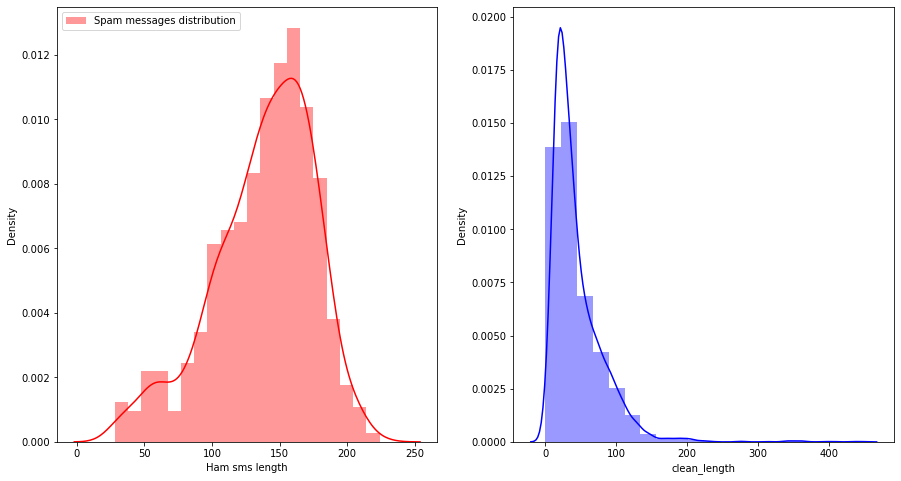

In [19]:
# Message distribution AFTER cleaning

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['label']==1]['clean_length'],bins = 20,ax = ax[0],label='Spam messages distribution',color ='r')
ax[0].set_xlabel("Spam sms length")
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_length'],bins = 20,ax = ax[1],label='Ham messages distribution',color = 'b')
ax[0].set_xlabel("Ham sms length")
ax[0].legend()

plt.show()

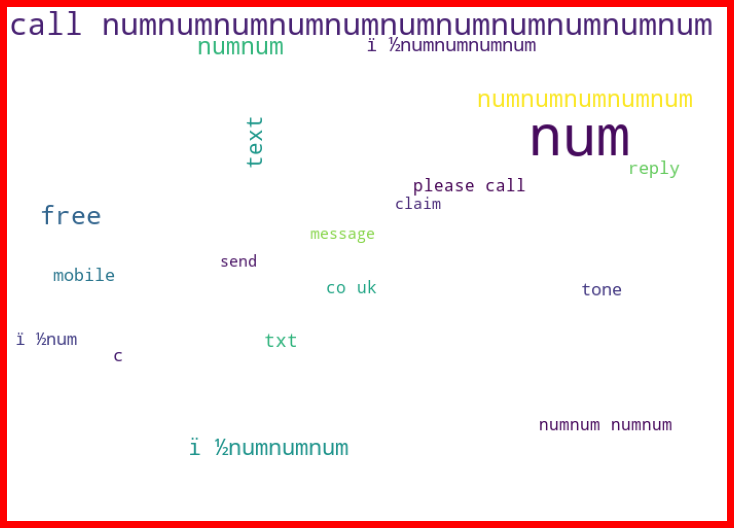

In [20]:
# Getting sense of loud word in spam
from wordcloud import WordCloud

spams = sms['message'][sms['label']==1]

spam_cloud = WordCloud(width = 700, height = 500, background_color = "white", max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

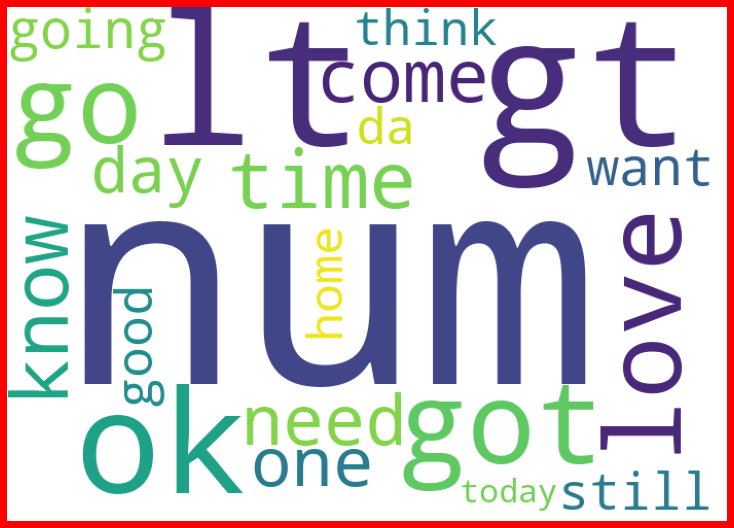

In [21]:
# Getting sense of loud word in ham
from wordcloud import WordCloud

hams = sms['message'][sms['label']==0]

spam_cloud = WordCloud(width = 700, height = 500, background_color = "white", max_words=20).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Model building

In [22]:
# 1. Convert text into vectors using tf-idf
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(sms['message'])

x = features
y = sms['label']


In [23]:
# Train and predict
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)
naive.fit(x_train,y_train)
y_pred = naive.predict(x_test)
print("Final score = >", accuracy_score(y_test,y_pred))

Final score = > 0.9784637473079684


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       0.99      0.85      0.92       191

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



[[1201    1]
 [  29  162]]


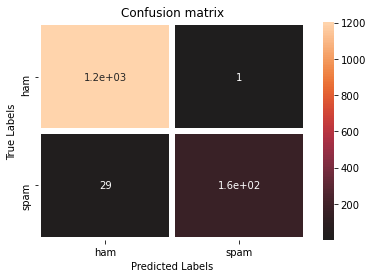

In [25]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)
ax = plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,center=0)

ax.set_xlabel("Predicted Labels");ax.set_ylabel("True Labels")

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()


In [35]:
naive.predict(tf_vec.transform(['Free Entry']))

array([1], dtype=int64)

In [36]:
naive.predict(tf_vec.transform(['Have a good day']))

array([0], dtype=int64)